# SITUACION PROBLEMA

## Evaluacion del clima en Autralia durante los años

La base de datos a analizar se descargó de la plataforma Kaggle, en este caso la información recopilada en la base de datos es sobre el clima de Australia desde 2008 hasta el 2016. En esta base de datos se pueden encontrar valore sobre la temperatura, lluvia, velocidad del viento etc., que se han registrado en Australia. Lo que se desea lograr con este análisis de datos es conocer cual es el clima que tiene Australia, saber cuántas y cuáles son las ciudades con mayor lluvia y como se ha modificado el clima durante los últimos años.

## Base de datos de la lluvia en Autralia 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from operator import itemgetter

In [2]:
pip install plotly 

     |████████████████████████████████| 23.9 MB 4.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.express as px

In [4]:
%ls 2datasets/

 adult.csv                   census.csv                   movies.csv
 airline_data.csv            cwurData.csv                 nhanes_2015_2016.csv
 antropometria00.csv         data.csv                     pokemon.csv
 antropometria-dataset.csv   headbrain.csv                sample_pivot.csv
 Canada.xlsx                'Lluvia en Australia 1.csv'   tips.csv
 Cartwheeldata.csv          'Lluvia en Australia.xlsx'    weight-height.csv


In [5]:
path = '2datasets/Lluvia en Australia 1.csv'
df = pd.read_csv(path)
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,12/6/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,12/7/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,12/8/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,12/9/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,12/10/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Aquí se logra ver el contenido de la base de datos en donde se almaceno la información climática de Australia desde  el 2008 hasta el 2016, dentro de esta base de datos encontramos las diferentes ciudades que pertenecen a Australia tenemos el máximo de temperatura, el mínimo de temperatura, la lluvia, la humedad y otros datos que serán relevantes para el análisis y posterios conslucionde las preguntas previamente planteadas.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Como se observa en la información de los datos podemos observar que la mayoría de ellos son numéricos, solo la fecha, locación, dirección del viento y otros son palabras. Esto nos ayuda a determinar cuáles son la evaluación que se pueden realizar a cada variable y determinar las que se utilizaran en la evaluación de la situación problema. 

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Se utilizo la función “describe” para un mejor entendimiento de las variables, y con eso determinar cuales son las que se utilizaran dentro del análisis. Aquí se puede observar los diferentes cuartiles de las variables, con lo cual ya podemos realizar algunas hipótesis del clima de Australia.

In [8]:
x = pd.pivot_table(df,
                   index=('Location')
                  )
x
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,12/6/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,12/7/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,12/8/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,12/9/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,12/10/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


## Cuales son las variables de interes

Después de realizar un breve análisis de las variables que se encuentran en al base de datos del clima de Australia se llegó a la conclusión que para este análisis las variables que se utilizaran van a ser las siguientes: máxima temperatura, mínima temperatura, lluvia. Con esas variables se analizará cual es el clima que tiene Australia, saber cuántas y cuáles son las ciudades con mayor lluvia y como se ha modificado el clima durante los últimos años.

Se creará una nueva tabla solo con las variables escogidas, para esto se utilizará el código ‘drop’ para eliminar las variables innecesarias. La nueva tabla tomara el nombre de T1, y para poder ver de mejor manera la tabla solo se mostrarán los primero 10 datos 

In [9]:
T1 = pd.pivot_table(df,
               index = 'Location',
                          values = {'Rainfall','MaxTemp','MinTemp'},                         
              )
T1.head(20)

,MaxTemp,MinTemp,Rainfall
Location,,,
Adelaide,22.898934,12.579505,1.566354
Albany,20.070998,12.948438,2.263859
Albury,22.640872,9.530604,1.914115
AliceSprings,29.248420,13.142284,0.882850
BadgerysCreek,24.031208,11.131719,2.193101
Ballarat,18.287266,7.367950,1.740026
Bendigo,21.621746,8.593713,1.619380
Brisbane,26.448380,16.423807,3.144891
Cairns,29.558849,21.220467,5.742035


# Cual es el clima de Australia ?

Para el análisis de clima de Australia se procederá a realizar algunas graficas para conocer el comportamiento de las variables de la tabla T1. Lo que se busca en este apartado es conocer cuál es la temperatura máxima y mínima que se ha registrado en Australia, también se desea conocer cuál es la precipitación o la cantidad de lluvia que se tiene en Australia y por último conocer las 3 ciudades en donde llueve más.

Para poder responder a esta pregunta se realizará una gráfica de caja y bigote, también conocida como ‘Boxplot’, la cual nos mostrará los diferentes cuartiles de las variables escogidas. Lo que se busca aquí es identificar cual ha sido la temperatura máxima y la temperatura mínima que se tiene registrado en la base de datos, con esa información sabremos decir el comportamiento del clima en Australia.

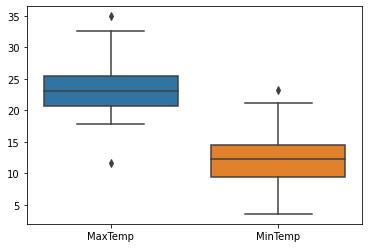

In [10]:
sns.boxplot(data = T1.loc[:,['MaxTemp','MinTemp']])

# Cuantas y cuales son las ciudades donde llueve mas en Australia ?

Para poder conocer cuantas y cuales son las ciudades en donde llueven más en Australia se realizarán dos gráficas. La primera grafica es un histograma de la cantidad de lluvia, con un rango de 0.5, de aquí se obtendrá la información de cuantas ciudades llueven más. La segunda grafica de barras en donde se muestra la cantidad de lluvia registrada por ciudad, de esta manera se concentra cuáles son las ciudades de Australia en donde llueven más. 

Para la grafica del histograma se utilizará la variable “Rainfall” la cual es el promedio de lluvia registrada por cada ciudad de Australia desde el 2008 al 2016. El histograma lo que nos indicara es cuantas ciudades comparten la misma cantidad de lluvia, de ese modo sabremos cuantas ciudades poseen la mayor cantidad de lluvia.

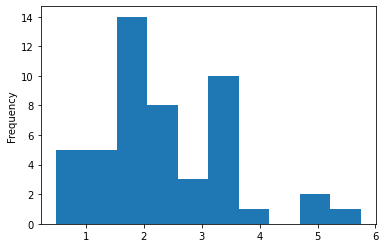

In [11]:
histogram = T1['Rainfall'].plot(kind='hist')

In [12]:
T1.head(10)

,MaxTemp,MinTemp,Rainfall
Location,,,
Adelaide,22.898934,12.579505,1.566354
Albany,20.070998,12.948438,2.263859
Albury,22.640872,9.530604,1.914115
AliceSprings,29.248420,13.142284,0.882850
BadgerysCreek,24.031208,11.131719,2.193101
Ballarat,18.287266,7.367950,1.740026
Bendigo,21.621746,8.593713,1.619380
Brisbane,26.448380,16.423807,3.144891
Cairns,29.558849,21.220467,5.742035


Para conocer cuales son las 3 ciudades en donde llueve más en Australia se realizar una grafico de columnas, las variables a analizar van a ser Location y Rainfall. Para que la grafica se vea mejor y sea más entendible se utilizara la librería matplotlib junto a la función ggplot para dar un mejor aspecto a la gráfica. 

In [13]:
type(x)
mpl.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,7)

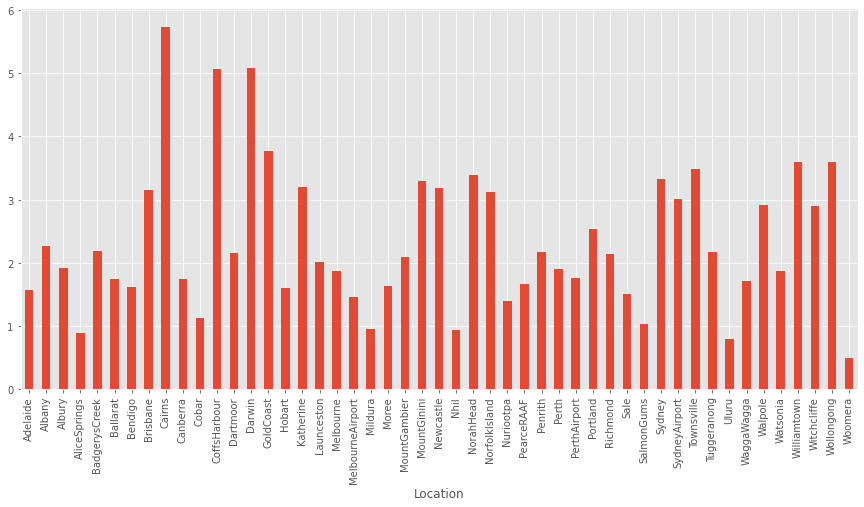

In [14]:
T1.groupby('Location').mean()["Rainfall"].plot(kind='bar')

Ya conocemos que en Australia solo 3 de sus ciudades poseen una lluvia mayor a 5.0 y ya conocemos cuales son los nombres de esas 3 ciudades: Cairns, Darwin y Coffs Harbour. Para combinar esta información y observar la relación entre estas tres ciudades se realizará una gráfica de pie con los datos de este análisis.

In [15]:
#ordenados = sorted(T1['Rainfall'])
#ordenados

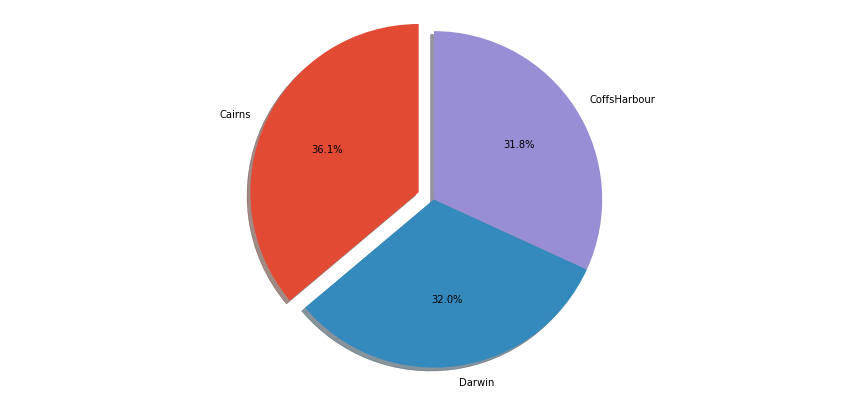

In [16]:
labels = 'Cairns', 'Darwin', 'CoffsHarbour'
sizes = [5.742, 5.0924,5.061]
explode = (0.1, 0, 0,) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

## Ha sufrido Australia un cambio de clima en los últimos años?

Para responder a esta pregunta se utilizará otra tabla en la cual se tenga en cuenta las fechas y no la locación. Las variables que se utilizaran van ha ser las mismas, máximas y mínima de temperatura y lluvia, de esta manera se conocerá cual ha sido el comportamiento de estas variables durante el 2008 y el 2016. A partir de esa información se podrá realizar un pronóstico de tiempo general. 

In [17]:
y = pd.pivot_table(df,
                   index=('Date')
                  )
y
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,12/6/2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,12/7/2008,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,12/8/2008,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,12/9/2008,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,12/10/2008,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [18]:
T2 = y.drop(['Cloud3pm','Cloud9am','Evaporation','Humidity3pm','Humidity9am','Pressure3pm','Pressure9am','Sunshine',
        'Temp3pm','Temp9am','WindGustSpeed','WindSpeed3pm','WindSpeed9am'],
       axis=1)
T3 = T2.head(10)
T3

,MaxTemp,MinTemp,Rainfall
Date,,,
1/1/2008,34.200000,13.600000,0.000000
1/1/2009,28.144444,15.482222,0.528889
1/1/2010,28.217391,18.447826,5.456522
1/1/2011,30.134783,18.415217,0.976744
1/1/2012,30.343478,16.777778,0.668182
1/1/2013,31.447826,17.504444,1.088889
1/1/2014,29.033333,17.202128,0.191304
1/1/2015,30.795918,16.591667,4.762500
1/1/2016,30.300000,18.478723,0.795745


Para realizar este análisis se creo una nueva tabla que contiene las variables preasignadas, pero con respecto a las fechas, esta table se llama T2. Al ya tener esta nueva tabla se realizará el grafico de líneas con cada una de las variables, de esta manera podremos observar cómo se han modificado a lo largo del tiempo y poder conocer si han sido constante o no.

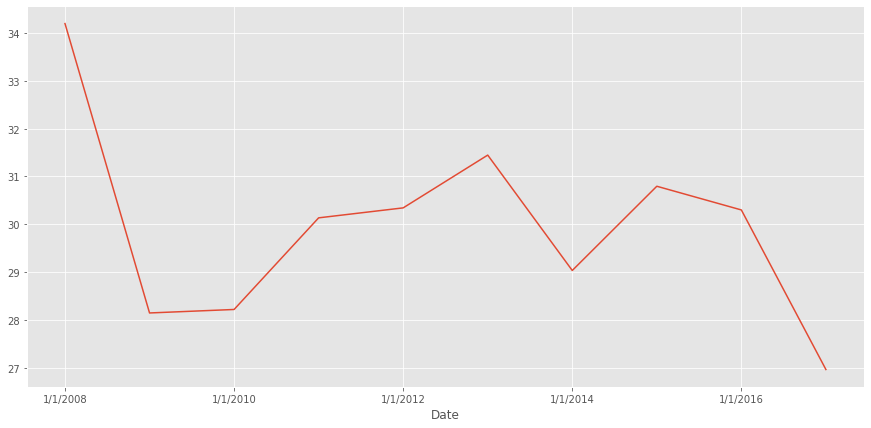

In [19]:
line_plot = T3['MaxTemp'].plot(kind='line')
plt.rcParams['figure.figsize']=(15,7)

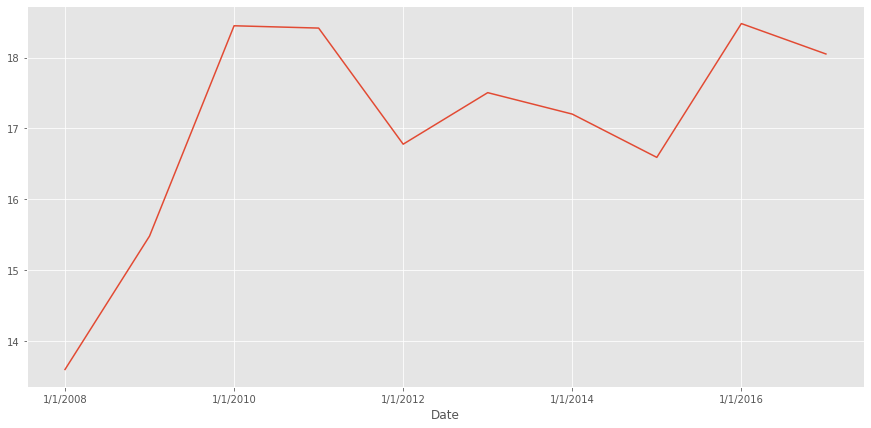

In [20]:
line_plot = T3['MinTemp'].plot(kind='line')
plt.rcParams['figure.figsize']=(15,7)

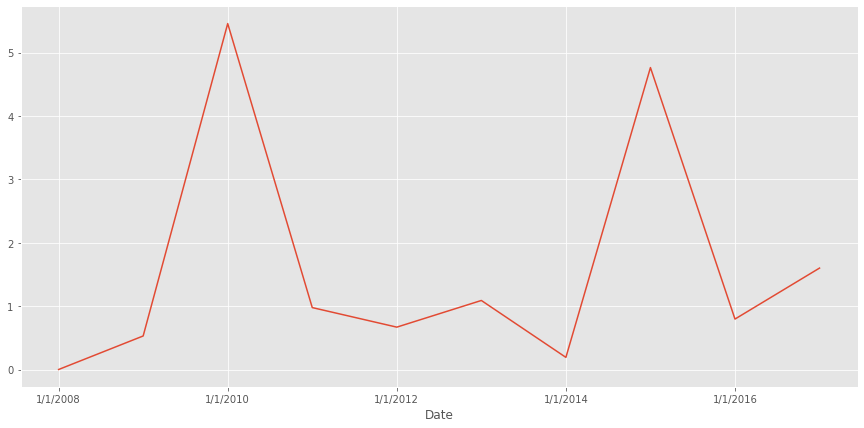

In [21]:
line_plot = T3['Rainfall'].plot(kind='line')
plt.rcParams['figure.figsize']=(15,7)

# ¿Existe con correlación en el clima de Sídney y Cairns?

In [22]:
is_Cairns = df.loc[:, 'Location'] == 'Cairns'
df_Cairns = df.loc[is_Cairns]
T4_1 = df_Cairns
T4_1 #df.iloc[87200	:90239]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
87200,12/1/2008,Cairns,25.2,32.3,0.4,4.0,6.4,NE,31.0,E,...,62.0,66.0,1011.3,1008.1,5.0,7.0,31.2,30.7,No,Yes
87201,12/2/2008,Cairns,24.2,32.3,8.4,6.6,5.3,NE,35.0,S,...,75.0,62.0,1011.9,1008.0,7.0,7.0,29.0,31.1,Yes,No
87202,12/3/2008,Cairns,23.9,32.8,0.6,5.6,11.3,SSE,31.0,SSE,...,69.0,42.0,1012.2,1009.9,7.0,5.0,29.1,31.6,No,No
87203,12/4/2008,Cairns,22.2,33.6,0.0,9.6,12.3,SE,39.0,SSE,...,60.0,31.0,1013.3,1010.9,2.0,1.0,29.6,32.5,No,No
87204,12/5/2008,Cairns,23.2,33.5,0.0,11.6,11.8,SE,43.0,SSE,...,64.0,56.0,1013.8,1011.0,4.0,2.0,29.7,32.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90235,6/21/2017,Cairns,19.9,26.1,0.4,NaN,NaN,SE,48.0,S,...,93.0,78.0,1019.3,1016.3,8.0,8.0,20.8,23.4,No,No
90236,6/22/2017,Cairns,19.7,27.4,0.2,NaN,NaN,SE,46.0,SSE,...,62.0,61.0,1020.0,1016.7,NaN,8.0,23.0,25.2,No,No
90237,6/23/2017,Cairns,19.7,27.3,1.0,NaN,NaN,SE,39.0,S,...,81.0,55.0,1018.9,1015.3,8.0,8.0,21.2,25.7,No,Yes
90238,6/24/2017,Cairns,19.3,25.6,1.2,NaN,NaN,E,41.0,S,...,85.0,81.0,1016.2,1014.6,5.0,8.0,21.5,22.1,Yes,Yes


In [23]:
is_Sydney = df.loc[:, 'Location'] == 'Sydney'
df_Sydney = df.loc[is_Sydney]
T4_2 = df_Sydney
T4_2 #df.iloc[30176:33519]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,6/21/2017,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
33516,6/22/2017,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
33517,6/23/2017,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
33518,6/24/2017,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


## Concluciones 

Después de analizar todas las variables que se tenían en la base de datos del clima de Australia se decidió que las únicas variables que su utilizarían iban a ser MaxTemp MinTemp Rainfall, de esta manera se empezaron a responder las preguntas previamente planteadas.

La primera pregunta se enfocaba en descubrir cual es la temperatura de Australia por lo cual se utilizo la grafica de caja y bigote, la sorpresa que me lleve al revisar la información que arrojo la grafica fue que el clima de Australia es muy variado.  Se encontró que la temperatura máxima que ha llegado Australia es de 33 grados y la mínima es de 7 grados lo cual nos indica que el clima puede variar de un calor similar a un desierto y al mismo tiempo puede llegar a temperaturas de casi congelación. 

La segunda pregunta trataba sobre cuantas y cuáles eran las ciudades donde más llovía en Australia para esto se realizó un histograma con la variable de lluvia la cual nos informa que solo 3 ciudades tenían una lluvia mayor a 5, además se pudo observar que 14 ciudades compartían el mismo número de lluvia el cual era 1.5-2. Al ya saber que solo había 3 ciudades en donde la lluvia era mayor a 5 se decidió buscar cuales eran, para esto se realizó la gráfica columnas con la variable de location y Rainfall, de esta manera encontramos que las ciudades con mayor lluvia eran: Cairns, Darwin y Coffs Harbour.

La última pregunta busca conocer si el clima de Australia se ha modificado durante los últimos años y para eso se decidió realizar el gráfico de líneas para cada variable, en el caso de la temperatura se puede observar que, si ha tenido un cambio notorio. En el caso de la máxima temperatura se observa que ha decaído durante los últimos años, en el 2008 se registraba una temperatura máxima de 34 centígrados, pero en el 2017 se registró una máxima de 27 centígrados. En el caso de la temperatura mini ha aumento su temperatura, en el 2008 la temperatura mínima fue de 23 centígrados y en el 2017 llego a los 18 centígrados.
En el caso de las lluvias durante los años se ve que ha sido constante solo tiene unos pequeños picos a mediados del 2010 y 2015.
